In [1]:
from pynq import Overlay

In [2]:
ol = Overlay("design_1_wrapper.bit")

In [3]:
ol?

In [4]:
lorenz = ol.lorenz_hardware_0

In [26]:
def binary_to_float(binary):
    return float(binary)/(2**24)   

In [27]:
binary_to_float(xnew)

1.0125733017921448

In [33]:
x = 16777216
y = 16777216
z = 16777216
xvals = [1]
yvals = [1]
zvals = [1]
for i in range(1000):
    lorenz.write(0x00, x)
    lorenz.write(0x04, y)
    lorenz.write(0x08, z)
    xnewbin = lorenz.read(0x0C)
    ynewbin = lorenz.read(0x10)
    znewbin = lorenz.read(0x14)
    xvals.append(binary_to_float(xnewbin))
    yvals.append(binary_to_float(ynewbin))
    zvals.append(binary_to_float(znewbin))
    x = xnewbin
    y = ynewbin
    z = znewbin

print(xvals)

[1, 1.0125733017921448, 1.023442566394806, 1.0614320635795593, 1.0987309217453003, 1.1607701182365417, 1.2238911390304565, 1.3104695677757263, 1.4005820751190186, 1.5139119029045105, 1.6339314579963684, 1.7780139446258545, 1.932767629623413, 2.1136624813079834, 2.310272216796875, 2.536610782146454, 2.785155177116394, 3.068981885910034, 3.3835508823394775, 3.7416399121284485, 4.141969561576843, 4.597854256629944, 4.258089661598206, 4.847309768199921, 4.759581446647644, 5.4204981327056885, 5.59011173248291, 6.368098497390747, 6.659916937351227, 6.949772894382477, 7.201183199882507, 7.449486792087555, 7.667654514312744, 7.88261079788208, 8.929821193218231, 9.14441728591919, 10.08545869588852, 10.027977049350739, 10.854710161685944, 9.370758295059204, 11.813884437084198, 8.925140678882599, 12.737628281116486, 8.15130227804184, 13.385664165019989, 7.739681899547577, 14.06436824798584, 7.716903805732727, 14.838154077529907, 8.080640494823456, 13.363895654678345, 8.509615063667297, 12.4333972

AttributeError: 'Figure' object has no attribute 'plot'

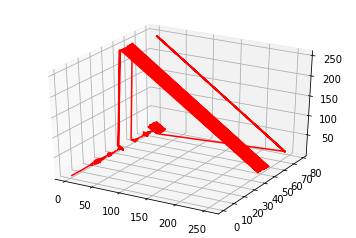

In [37]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xvals, yvals, zvals, 'red')
fig.plot()

In [7]:
from pynq import DefaultIP

class AddDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)
        
    bindto = ['User_Company:SysGen:simple_add:1.0']
    
    def add(self, a, b):
        self.write(0x00, a) # replace question marks again!
        self.write(0x04, b) # replace question marks again!
        return self.read(0x08) # replace question marks again!

In [8]:
ol = Overlay("design_1_wrapper.bit") # Hwh is parsed here
simple_add2 = ol.simple_add_0

In [16]:
nb = simple_add2.add(2,-19)
nb
?nb

In [10]:
output_s = simple_add2.add(2,-19) # answer now assigned to ‘output_s’
output_s # will print out the answer

4294967279

In [9]:
b = format(16777216, 'b')
b


'1000000000000000000000000'

In [17]:
def to_signed(val,b):
    signedVal = val-(2**b)*int(str((val)>>b-1))
    return signedVal

In [20]:
to_signed(output_s, 32)

-17